In [115]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore')

In [3]:
#load dataset
cars = pd.read_csv("car data.csv")
cars

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [5]:
cars.shape

(301, 9)

In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
cars.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
#find missing values
cars.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [18]:
#since there is no missing values, start data preprocessing
#cars["Age"] = 2020 - cars["Year"]
#cars.drop('Year', axis=1, inplace=True)
cars.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [22]:
cars["Depreciation"] = cars["Present_Price"] - cars["Selling_Price"]
cars["Depreciation"]

0      2.24
1      4.79
2      2.60
3      1.30
4      2.27
       ... 
296    2.10
297    1.90
298    7.65
299    1.00
300    0.60
Name: Depreciation, Length: 301, dtype: float64

### Exploratory Data Analysis

In [26]:
cars["Car_Name"].head()

0       ritz
1        sx4
2       ciaz
3    wagon r
4      swift
Name: Car_Name, dtype: object

In [24]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
 8   Age            301 non-null    int64  
 9   Depreciation   301 non-null    float64
dtypes: float64(3), int64(3), object(4)
memory usage: 23.6+ KB


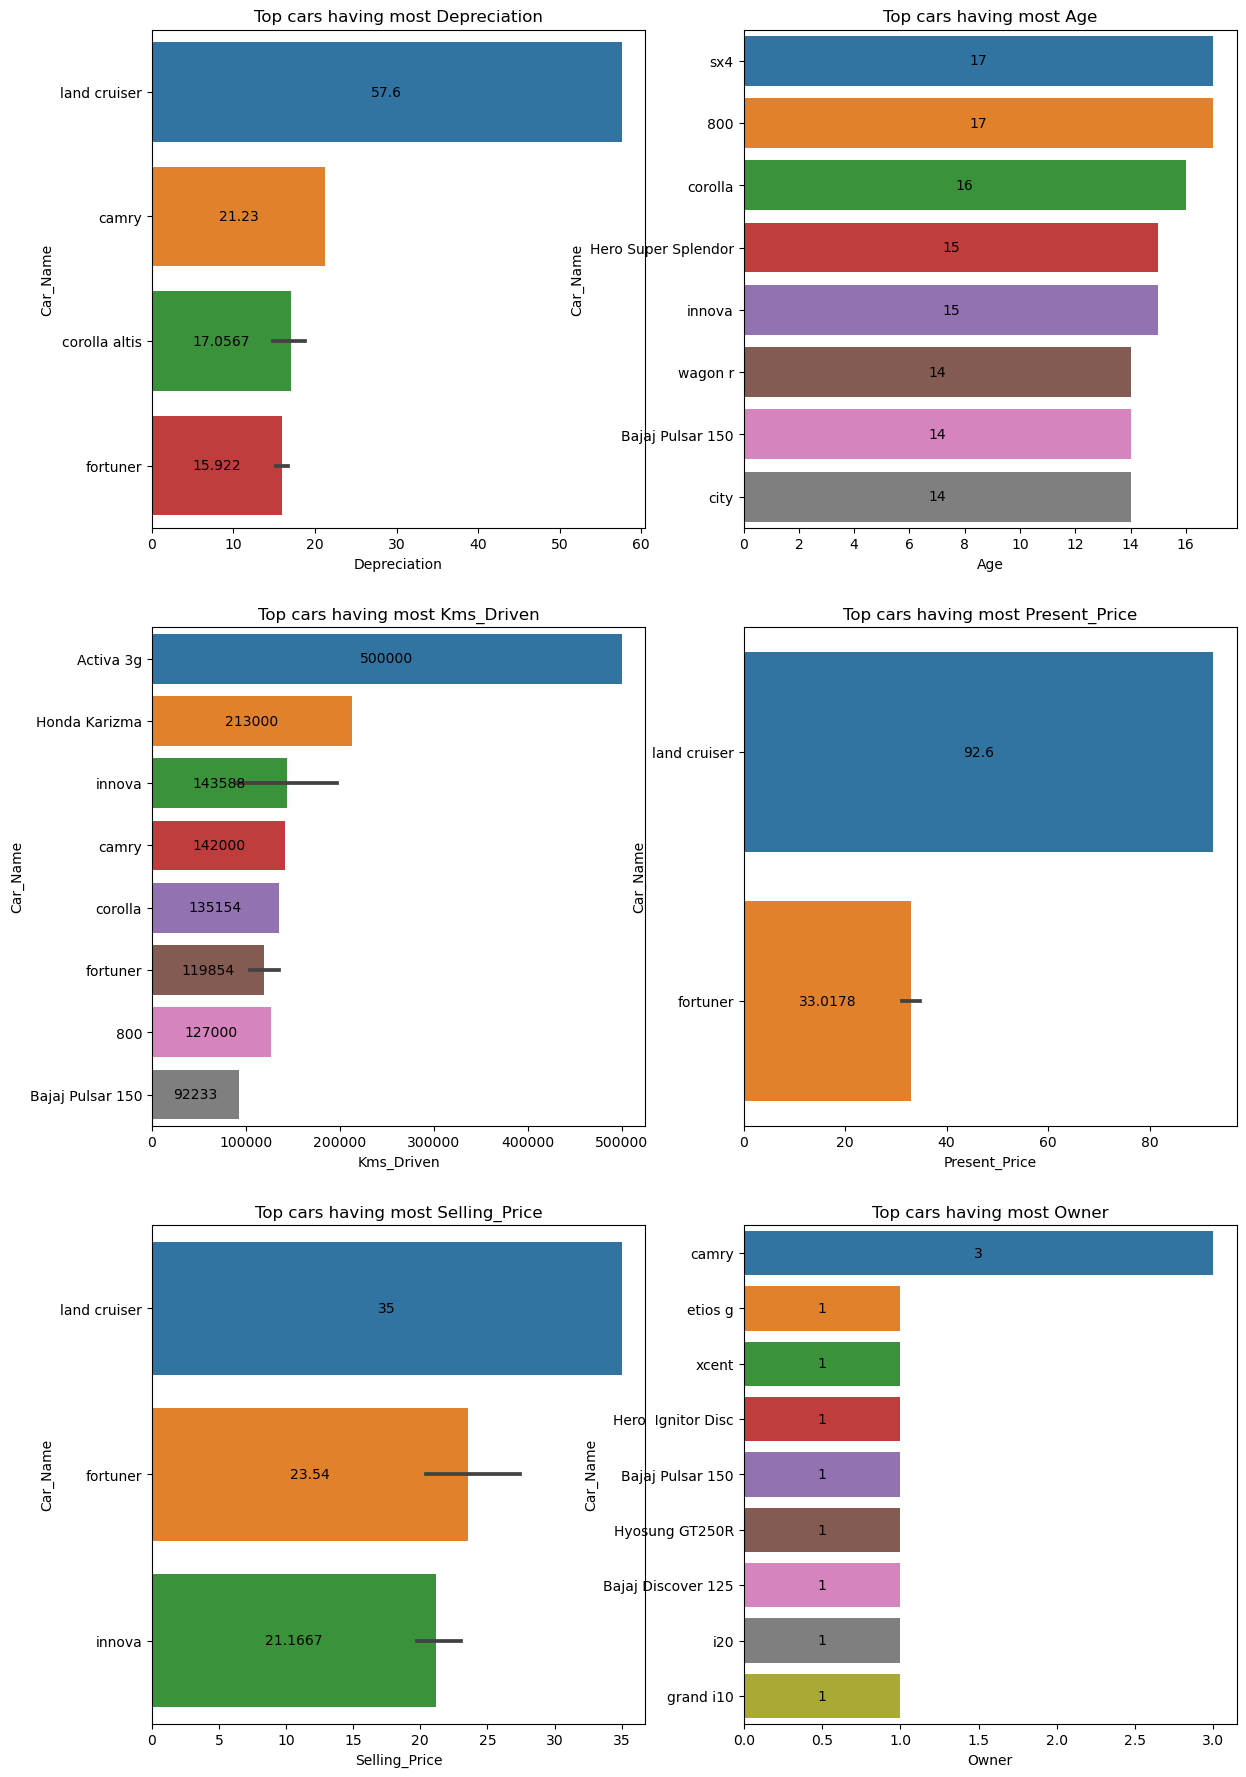

In [62]:
# top cars in different features of data

column_list = ["Depreciation","Age","Kms_Driven","Present_Price","Selling_Price","Owner"]
plt.figure(figsize=(14,22))
for i, col in enumerate(column_list):
    plt.subplot(3,2,i+1)
    ax = sns.barplot(data=cars.sort_values(by=col,ascending=False).head(10), x=col, y="Car_Name")
    ax.bar_label(ax.containers[0], label_type="center")
    plt.title(f"Top cars having most {col}")

plt.show();


In [42]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
 8   Age            301 non-null    int64  
 9   Depreciation   301 non-null    float64
dtypes: float64(3), int64(3), object(4)
memory usage: 23.6+ KB


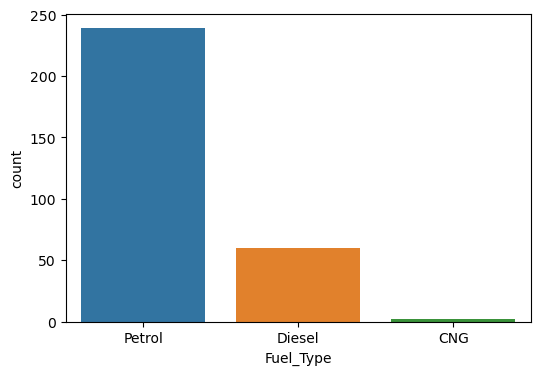

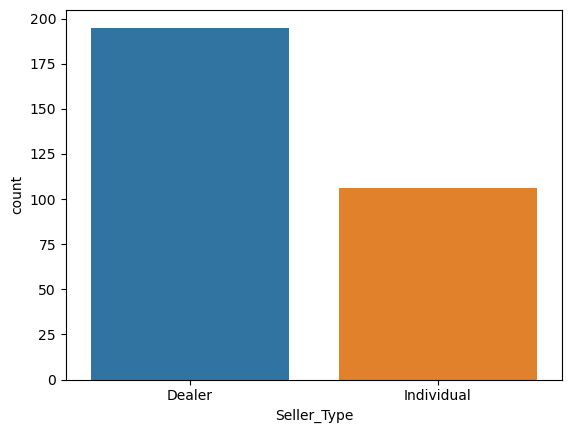

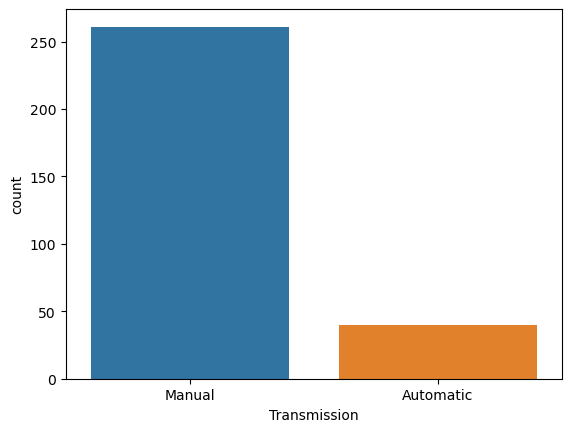

In [92]:
cat_columns = ["Fuel_Type","Seller_Type","Transmission"]
i=0
plt.figure(figsize=(6,4))
while i<3:
    sns.countplot(x=cat_columns[i], data=cars)
    i += 1
    plt.show();


C:\Users\fbegu\AppData\Local\Temp\ipykernel_25088\1905083829.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=cars.corr(),annot=True,linewidth=0.5, cmap="mako")


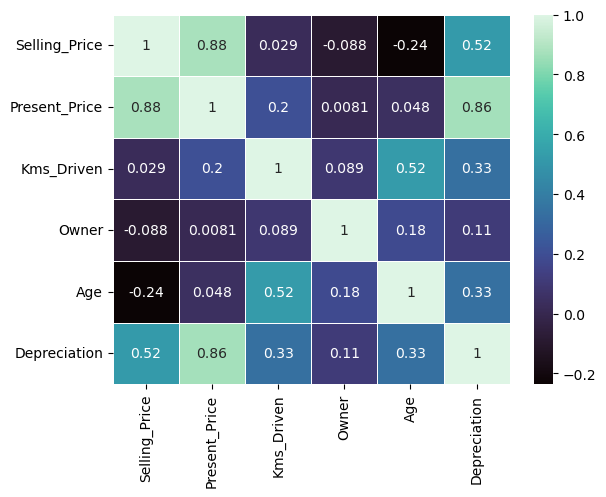

In [110]:
sns.heatmap(data=cars.corr(),annot=True,linewidth=0.5, cmap="mako")
plt.show();

TypeError: plot got an unexpected keyword argument 'x'

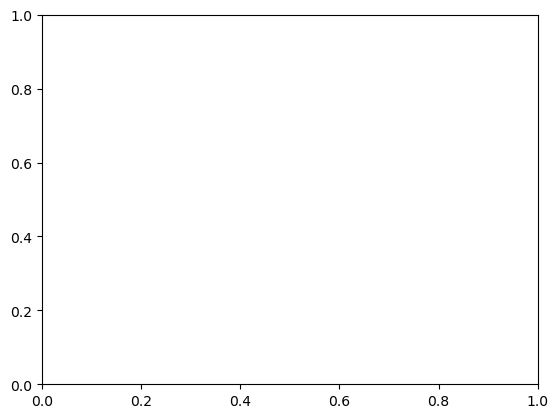

In [114]:
#plt.plot(x=cars["Selling_Price"], y= cars["Car_Name"], kind="bar", color=["salmon", "lightblue"], figsize=(6,4))
#plt.show();